In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [6]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
run=20 #1/4 degree NeverWorld2 setup
#run=26 #1/8 degree NeverWorld2 setup
#run=28 #1/16 degree NeverWorld2 setup
fs=xr.open_dataset('run%i/static.nc' % (run), decode_times=False)
os=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False)
forcing=xr.open_dataset('run%i/forcing_00000500.nc' % (run), decode_times=False)
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

sn     = xr.open_dataset('run%i/snapshots_000%i.nc' % (run, end_time-500+5), decode_times=False) #snapshot
av     = xr.open_dataset('run%i/averages_000%i.nc' % (run, end_time-500+2), decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
#print(av)

/glade/p/univ/unyu0004/neerajab/NeverWorld2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [5]:
#For the 1/32 degree run:

%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
run=33 #1/32 degree NeverWorld setup
fs=xr.open_dataset('run%i/static.nc' % (run), decode_times=False)
os=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False)
forcing=xr.open_dataset('run%i/forcing_00002000.nc' % (run), decode_times=False)

av=xr.open_mfdataset(['run33/averages_00001702.nc','run33/averages_00001802.nc', 'run33/averages_00001902.nc', 'run33/averages_00002002.nc', 'run33/averages_00002102.nc'],decode_times=False,combine='by_coords')
#print(av)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/neerajab/NeverWorld2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [154]:
#COMPUTE KE AND THEN WEIGH BY THICKNESS
Nlayers=15
lon=fs['geolon']; lat=fs['geolat']
depth = fs['depth_ocean']
xh = fs.xh.values
yh = fs.yh.values

h  = np.array(av['h'][-1,:,:,:]);

u_full = np.array(av['u'][-1,:,:,:]); u_full = 0.5*(u_full[:,:,1:]+u_full[:,:,:-1]); 
v_full = np.array(av['v'][-1,:,:,:]); v_full = 0.5*(v_full[:,1:,:]+v_full[:,:-1,:]); 

u  = np.array(av['u'][-1,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); 
v  = np.array(av['v'][-1,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); 
h[h<=1]=np.nan
u[np.isnan(h)]=np.nan
v[np.isnan(h)]=np.nan
print(u.shape)
Bottom_u = np.zeros([len(yh),len(xh)])
Bottom_v = np.zeros([len(yh),len(xh)])
for i in range(len(yh)):
    for j in range(len(xh)):
        u_local = u[:,i,j]; v_local = v[:,i,j];
        u_b =u_local[~np.isnan(u_local)]; 
        v_b =v_local[~np.isnan(v_local)]; 
        if u_b.any():
            u_b=u_b[-1]; Bottom_u[i,j]=u_b        
        if v_b.any():
            v_b=v_b[-1]; Bottom_v[i,j]=v_b
    #print(i)    
print('done')


(15, 560, 240)
done


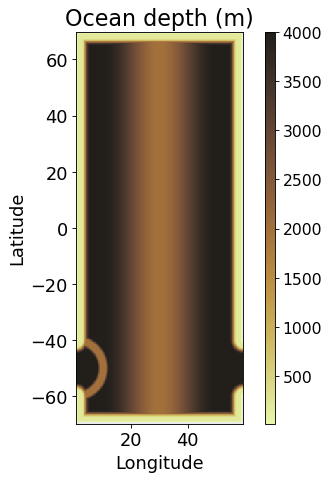

In [148]:
#Plotting ocean depth
fig = plt.figure(figsize=(4, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('Ocean depth (m)',fontsize=20)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

plotted =ax1.pcolor(xh,yh,depth,cmap=cmocean.cm.turbid)
#ax1.plot(xh[index_lon],yh[index_lat],'*',markersize=15,color=[0.8, 0.8, 0.8])
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('topography.png')

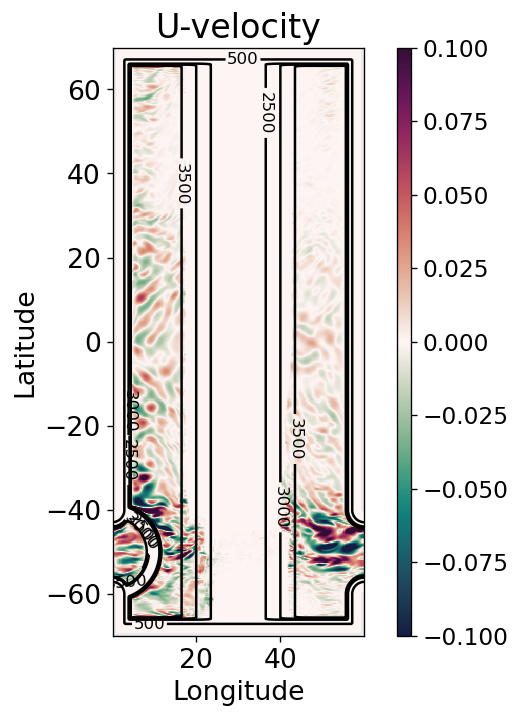

In [155]:
fig = plt.figure(figsize=(4, 7), dpi= 120, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('U-velocity',fontsize=20)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

plotted =ax1.pcolor(xh,yh,u_full[-1,:,:],cmap=cmocean.cm.curl,vmin=-.1,vmax=0.1)
plotted2 =ax1.contour(xh,yh,depth,[500,2500,3000,3500],colors='k',linewidth=.5)
ax1.clabel(plotted2,plotted2.levels,fmt='%.0f')
#ax1.plot(xh[index_lon],yh[index_lat],'*',markersize=15,color=[0.8, 0.8, 0.8])
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('topography.png')

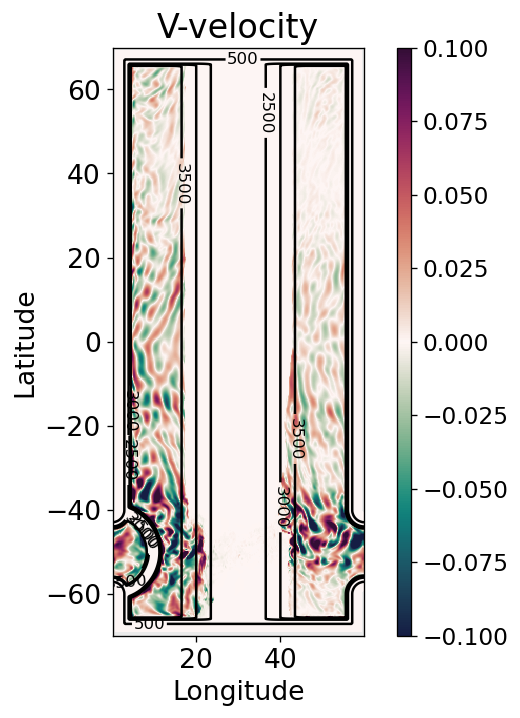

In [156]:
fig = plt.figure(figsize=(4, 7), dpi= 120, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('V-velocity',fontsize=20)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

plotted =ax1.pcolor(xh,yh,v_full[-1,:,:],cmap=cmocean.cm.curl,vmin=-.1,vmax=0.1)
plotted2 =ax1.contour(xh,yh,depth,[500,2500,3000,3500],colors='k',linewidth=.5)
ax1.clabel(plotted2,plotted2.levels,fmt='%.0f')
#ax1.plot(xh[index_lon],yh[index_lat],'*',markersize=15,color=[0.8, 0.8, 0.8])
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('topography.png')

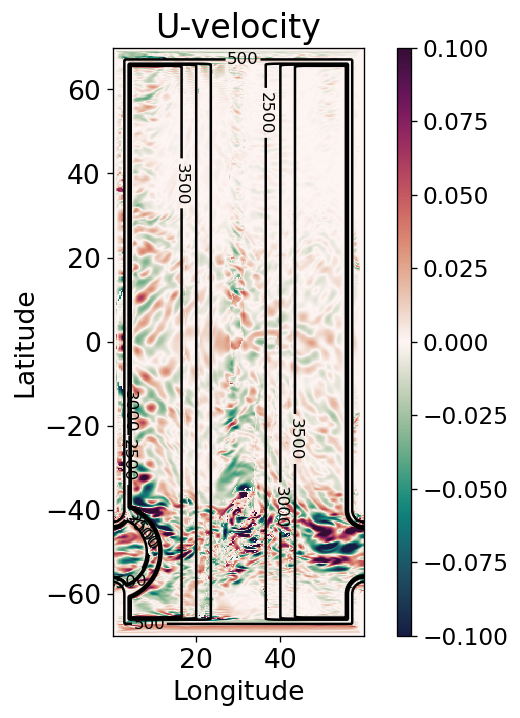

In [157]:
fig = plt.figure(figsize=(4, 7), dpi= 120, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('U-velocity',fontsize=20)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

plotted =ax1.pcolor(xh,yh,Bottom_u[:,:],cmap=cmocean.cm.curl,vmin=-.1,vmax=0.1)
plotted2 =ax1.contour(xh,yh,depth,[500,2500,3000,3500],colors='k',linewidth=.5)
ax1.clabel(plotted2,plotted2.levels,fmt='%.0f')
#ax1.plot(xh[index_lon],yh[index_lat],'*',markersize=15,color=[0.8, 0.8, 0.8])
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('topography.png')

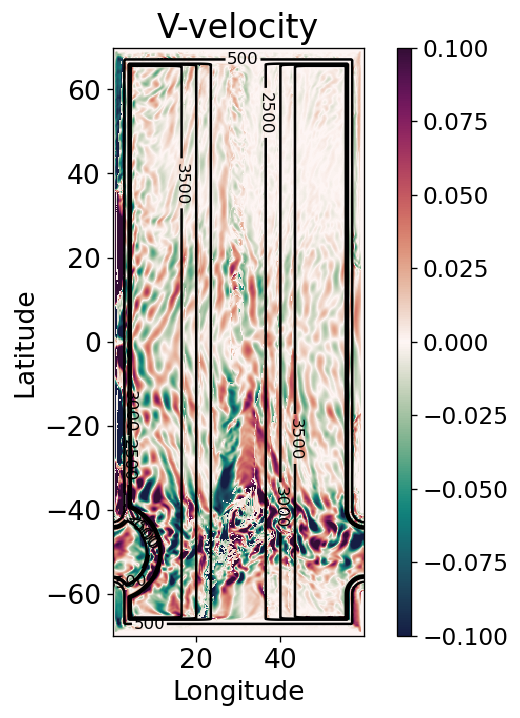

In [158]:
fig = plt.figure(figsize=(4, 7), dpi= 120, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('V-velocity',fontsize=20)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

plotted =ax1.pcolor(xh,yh,Bottom_v[:,:],cmap=cmocean.cm.curl,vmin=-.1,vmax=0.1)
plotted2 =ax1.contour(xh,yh,depth,[500,2500,3000,3500],colors='k',linewidth=.5)
ax1.clabel(plotted2,plotted2.levels,fmt='%.0f')
#ax1.plot(xh[index_lon],yh[index_lat],'*',markersize=15,color=[0.8, 0.8, 0.8])
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('topography.png')